In [2]:
from pathlib import Path
import yaml
import pickle
from imitative_agent import ImitativeAgent
import matplotlib.pyplot as plt
from lib.dataset_wrapper import Dataset
from tqdm.notebook import tqdm
import numpy as np

#model_path = Path("../out/imitative_agent/dynamic_GAN_lstm")
#basenames = ['0',
#             '0.01',
#             '0.1',
#             '1']

model_path = Path("../out/imitative_agent/static_GAN")
basenames = ['0',
             '0.01',
             '0.1',
             '1']

#model_path = Path("../out/imitative_agent/jerk")
#basenames = ['0',
#             '0.01',
#             '0.1',
#             '1']

def get_test_mse(agent):
    labels = ['JH', 'TB', 'TD', 'TT', 'LP', 'LH']
    dataset_name = agent.config['dataset']['names'][0]
    dataset = Dataset(dataset_name)
    items_name = agent.datasplits[dataset_name][2]
    items_sound = dataset.get_items_data(agent.config['dataset']['sound_type'], cut_silences=True)
    items_art = dataset.get_items_data('art_params', cut_silences=True)
    mse = {l: [] for l in labels}
    for item_name in items_name:
        item_sound = items_sound[item_name]
        art_estimated = agent.repeat(item_sound)['art_estimated']
        art_real = items_art[item_name]
        if art_real.shape != art_estimated.shape:
            print(f"Inferred and gold articulatory trajectories should be the same size." \
                  f"Got {art_real.shape} for gold trajectories and {art_estimated.shape} for estimated ones.")
            break
            
        mse_item = ((art_real - art_estimated)**2).mean(axis=0)
        for i, label in enumerate(labels):
            mse[label].append(mse_item[i])
        

    mse['ave'] = np.mean([mse[label] for label in labels], axis=0)
    return mse

all_mse = {}
for basename in tqdm(basenames):
    agent_path = model_path / basename
    agent = ImitativeAgent.reload(str(agent_path))
    key = f"discriminator_loss_weight_{agent.config['training']['discriminator_loss_weight']}"
    #key = f"jerk_loss_weight_{agent.config['training']['jerk_loss_weight']}"
    mse = get_test_mse(agent)
    all_mse[key] = mse

  0%|          | 0/4 [00:00<?, ?it/s]

/home/engaclew/miniconda3/envs/agent/lib/python3.7/site-packages/torch/nn/modules/rnn.py:70: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


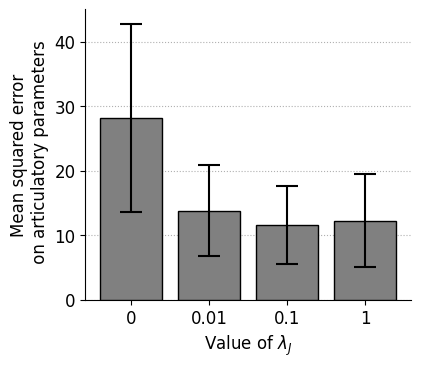

In [11]:
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib
import numpy as np
from collections import OrderedDict

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 12, 'legend.handleheight':1, 'hatch.linewidth': 2.0,
                           'lines.markersize':5, 'lines.linewidth':.75})

weights = [0, 0.01, 0.1, 1]
mean_values = []
std_values = []
for weight in weights:
    mean_values.append(np.mean(all_mse[f"discriminator_loss_weight_{weight}"]["ave"]))
    std_values.append(np.std(all_mse[f"discriminator_loss_weight_{weight}"]["ave"], ddof=1))
    #mean_values.append(np.mean(all_mse[f"jerk_loss_weight_{weight}"]["ave"]))
    #std_values.append(np.std(all_mse[f"jerk_loss_weight_{weight}"]["ave"], ddof=1))


cm = 1/2.54
fig, ax = plt.subplots(1, 1, figsize=(10.4*cm,9.04*cm), constrained_layout=True)

x = [0, 1, 2, 3]
ax.bar(x=x, height=mean_values, yerr=std_values, color='grey',
       error_kw=dict(lw=1.5, capsize=8, capthick=1.5), edgecolor='black',zorder=3)
ax.set_ylabel("Mean squared error\n on articulatory parameters")
ax.set_xticks(ticks=x, labels=weights)
ax.set_xlabel("Value of $\lambda_J$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(visible=True, axis='y', linestyle=':',zorder=0)
ax.set_ylim(0, 45)
#plt.savefig('/home/engaclew/agent/out/imitative_agent/dynamic_gan_5_frames_mse_art.png', dpi=300)
plt.savefig('/home/engaclew/agent/out/imitative_agent/static_gan_mse_art.png', dpi=300)
plt.show()

In [3]:
model_path = Path("../out/imitative_agent/dynamic_GAN_varying_frames_2_layers")

basenames = range(1,11)

all_mse = {}
for basename in tqdm(basenames):
    agent_path = model_path / str(basename)
    agent = ImitativeAgent.reload(str(agent_path))
    key = f"nb_frames_{agent.config['model']['discriminator_model']['nb_frames']}"
    #key = f"jerk_loss_weight_{agent.config['training']['jerk_loss_weight']}"
    mse = get_test_mse(agent)
    all_mse[key] = mse

  0%|          | 0/10 [00:00<?, ?it/s]

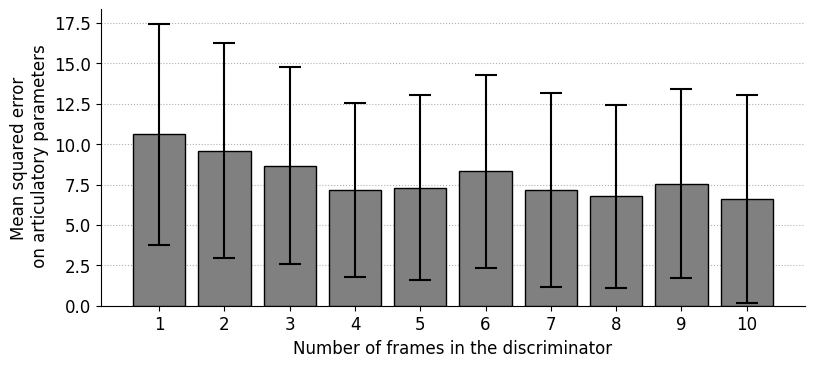

In [4]:
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib
import numpy as np
from collections import OrderedDict

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 12, 'legend.handleheight':1, 'hatch.linewidth': 2.0,
                           'lines.markersize':5, 'lines.linewidth':.75})

weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mean_values = []
std_values = []
for weight in weights:
    mean_values.append(np.mean(all_mse[f"nb_frames_{weight}"]["ave"]))
    std_values.append(np.std(all_mse[f"nb_frames_{weight}"]["ave"], ddof=1))
    #mean_values.append(np.mean(all_mse[f"jerk_loss_weight_{weight}"]["ave"]))
    #std_values.append(np.std(all_mse[f"jerk_loss_weight_{weight}"]["ave"], ddof=1))


cm = 1/2.54
fig, ax = plt.subplots(1, 1, figsize=(20.4*cm,9.04*cm), constrained_layout=True)

x = list(range(0, 10))
ax.bar(x=x, height=mean_values, yerr=std_values, color='grey',
       error_kw=dict(lw=1.5, capsize=8, capthick=1.5), edgecolor='black',zorder=3)
ax.set_ylabel("Mean squared error\n on articulatory parameters")
ax.set_xticks(ticks=x, labels=weights)
ax.set_xlabel("Number of frames in the discriminator")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(visible=True, axis='y', linestyle=':',zorder=0)
#plt.savefig('/home/engaclew/agent/out/imitative_agent/dynamic_GAN_varying_frames.png', dpi=300)
plt.show()

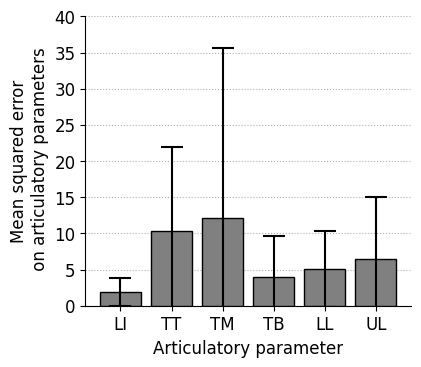

In [14]:
labels = ['JH', 'TB', 'TD', 'TT', 'LP', 'LH']
label_names = ["Jaw height", "Tongue body", "Tongue dorsum", "Tongue tip", "Lip protusion", "Lip height"]
mean_values = []
std_values = []
for label in labels:
    mean_values.append(np.mean(all_mse[f"nb_frames_6"][label]))
    std_values.append(np.std(all_mse[f"nb_frames_6"][label], ddof=1))

cm = 1/2.54
fig, ax = plt.subplots(1, 1, figsize=(10.4*cm,9.04*cm), constrained_layout=True)
x = list(range(0, len(labels)))
ax.bar(x=x, height=mean_values, yerr=std_values, color='grey',
       error_kw=dict(lw=1.5, capsize=8, capthick=1.5), edgecolor='black',zorder=3)
ax.set_ylabel("Mean squared error\n on articulatory parameters")

ax.set_xticks(ticks=x, labels=labels)
ax.set_xlabel("Articulatory parameter")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(visible=True, axis='y', linestyle=':',zorder=0)
ax.set_ylim(0, 40)

plt.savefig('/home/engaclew/agent/out/imitative_agent/dynamic_GAN_across_art_param.png', dpi=300)
plt.show()

/home/engaclew/miniconda3/envs/agent/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


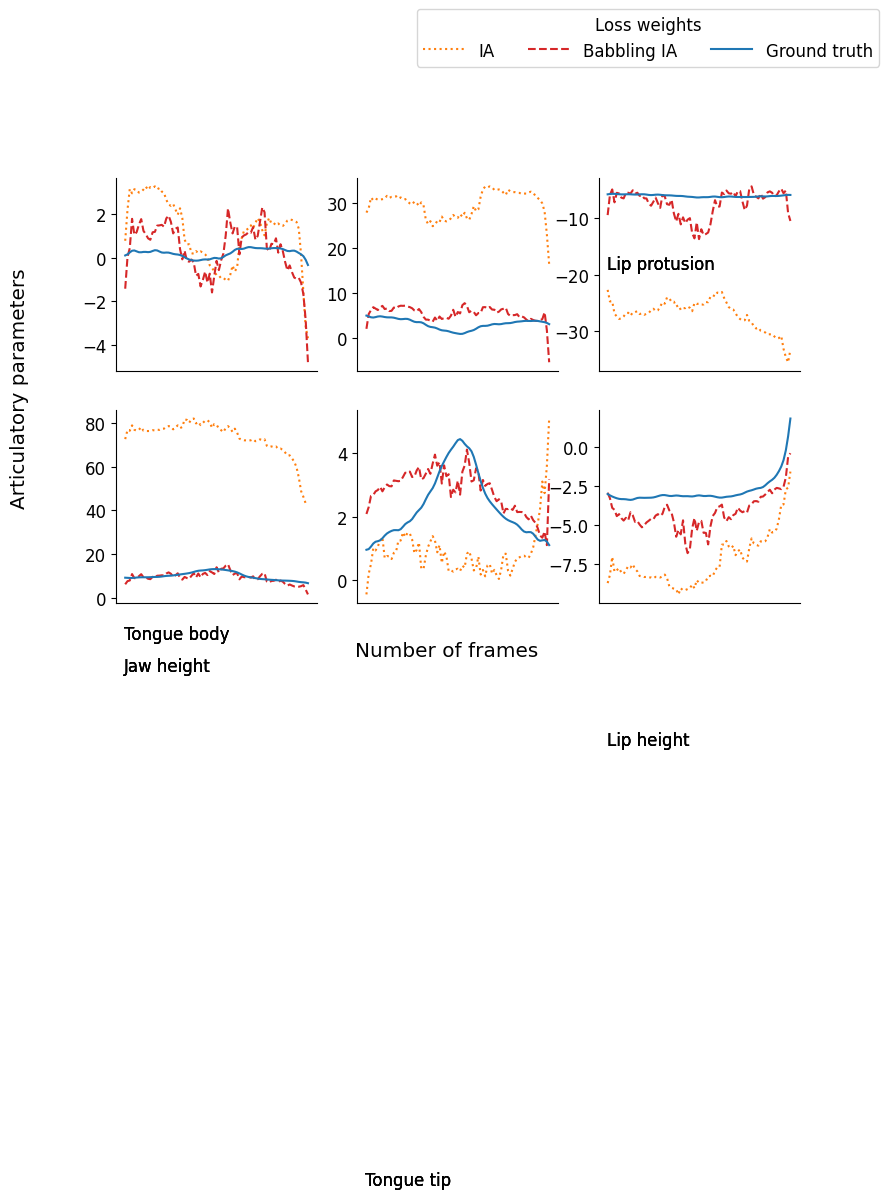

In [4]:
import torch
import matplotlib.pyplot as plt
from imitative_agent import ImitativeAgent
from lib.dataset_wrapper import Dataset
import matplotlib

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 12, 'legend.handleheight':1, 'hatch.linewidth': 2.0,
                           'lines.markersize':5, 'lines.linewidth':1.5})

def display_param(param, ax, label_curve, linestyle='-', color=None):
    labels = ["Jaw height", "Tongue body", "Tongue dorsum", "Tongue tip", "Lip protusion", "Lip height"]
    labels_short = ['JH', 'TB', 'TD', 'TT', 'LP', 'LH']
    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    for i, label in enumerate(labels):
        row, col = i%2, i//2
        if color is None:
            color = colors[i]
        ax[row, col].plot(param[:,i], label=label_curve, color=color, linestyle=linestyle)
        ax[row, col].spines['top'].set_visible(False)
        ax[row, col].spines['right'].set_visible(False)
        ax[row, col].set_xticks([])
        #ax[row,col].set_ylim(-20,20)
        ax[row,col].text(-0.5,-19, labels[i])   

def get_art(agent, sound_seq):
    nn_input = torch.FloatTensor(agent.sound_scaler.transform(sound_seq)).to("cuda")[
            None, :, :
        ]
    with torch.no_grad():
        art_seq_estimated_unscaled = agent.nn.inverse_model(nn_input)
        sound_seq_estimated_unscaled = agent.nn.direct_model(
            art_seq_estimated_unscaled
        )
        # _, art_unit_seq, _, _ = self.nn.art_quantizer.encode(
        #     art_seq_estimated_unscaled,
        # )

    sound_seq_estimated_unscaled = sound_seq_estimated_unscaled[0].cpu().numpy()
    art_seq_estimated_unscaled = art_seq_estimated_unscaled[0].cpu().numpy()
    art_seq_estimated = agent.synthesizer.art_scaler.inverse_transform(
        art_seq_estimated_unscaled
    )
    return art_seq_estimated

bn = 'lambda_0'
#item_name = 'item_0439'
tt = ["item_0000", "item_0001", "item_0002", "item_0003", "item_0004", "item_0005", 
 "item_0006", "item_0007", "item_0010", "item_0331", "item_0332", "item_0333", 
 "item_0334", "item_0335", "item_0338", "item_0339", "item_0340", "item_0341", 
 "item_0342", "item_0392", "item_0393", "item_0394", "item_0395", "item_0396", 
 "item_0397", "item_0398", "item_0399", "item_0400", "item_0401", "item_0427", 
 "item_0428", "item_0429", "item_0433", "item_0434", "item_0435", "item_0436", 
 "item_0437", "item_0438", "item_0439"]
item_name = 'item_0385'
#agents_path = ['../out/imitative_agent/jerk/ce39e7a37f70a95d96114db4efff5100-0',
#              '../out/imitative_agent/jerk/76356bfa078baa54f7fb16aee7c236ec-0',
#               '../out/imitative_agent/static_GAN/7661ab7c5f435c7266a686264f2a0de3-0', 
#               '../out/imitative_agent/dynamic_GAN_lstm/a73364ffc8c1748f2742258116124063-0']
#labels = ['Vanilla', 
#          'Jerk ($\lambda_J = 0.1$)', 
#          'Static GAN ($\lambda_G = 0.1$)', 
#          'Dynamic GAN ($\lambda_G = 0.1$)', 
#          'Groundtruth']

#agents_path = ['../out/imitative_agent/dynamic_GAN_lstm/0.1']
#labels = ['Dynamic GAN ($\lambda_G = 0.1$)', 
#          'Groundtruth']

agents_path = ['../out/imitative_agent/babbling_v2/classic_with_babblings',
              '../out/imitative_agent/babbling_v2/classic']
labels = ('IA', 'Babbling IA', 'Ground truth')
linestyles = ['dotted', 'dashed', '--', '-.', '-']
colors = ['tab:orange', 'tab:red', 'tab:green', 'tab:purple', 'tab:blue']

cm = 1/2.54
fig, ax = plt.subplots(2, 3, figsize=(22.4*cm,14.04*cm), constrained_layout=True)

# Plot estimated trajectories
for i, agent_path in enumerate(agents_path):
    agent = ImitativeAgent.reload(agent_path)
    dataset = Dataset('pb2007')
    sound_type = agent.synthesizer.config["dataset"]["sound_type"]
    art_type = agent.synthesizer.config["dataset"]["art_type"]
    synth_dataset = agent.synthesizer.dataset

    items_cepstrum = dataset.get_items_data(sound_type, cut_silences=True)
    item_cepstrum = items_cepstrum[item_name]
    nb_frames = len(item_cepstrum)

    art = get_art(agent, item_cepstrum)
    

    display_param(art, ax, label_curve=labels[i], linestyle=linestyles[i], color=colors[i])
    
# Plot real trajectories
real_art_params = dataset.get_items_data("art_params", cut_silences=True)
art_param = real_art_params[item_name]
display_param(art_param, ax, label_curve=labels[-1], linestyle=linestyles[-1], color=colors[-1])
h, l = ax[0,0].get_legend_handles_labels()
fig.legend(h, l, title='Loss weights', bbox_to_anchor=(1,1.2), ncol=5, handlelength=2.5)
fig.supxlabel("Number of frames")
fig.supylabel("Articulatory parameters")
#plt.savefig('/home/engaclew/agent/out/imitative_agent/dynamic_gan_groundtruth_odo.png', dpi=300, bbox_inches='tight')
plt.show()

222


In [29]:
# Plot TSNE

# list of vowels and consonants
vowels = ['a', 'e^', 'e', 'i', 'y', 'u', 'o', 'o^', 'x', 'x^', 'a~', 'e~', 'x~', 'o~', 'q']
consonants = ['p', 'f', 'b', 'v', 'm', 't', 's', 'd', 'z', 'n', 'k', 's^', 'g', 'z^', 'r', 'l', 'w', 'h', 'j']


agent_path = Path("../out/imitative_agent/dynamic_GAN_varying_frames/10")
agent = ImitativeAgent.reload(str(agent_path))
dataset_name = agent.config['dataset']['names'][0]
dataset = Dataset(dataset_name)
items_name = agent.datasplits[dataset_name][2]+agent.datasplits[dataset_name][1]+agent.datasplits[dataset_name][0]
items_art_gold = dataset.get_items_data('art_params', cut_silences=True)
items_lab = dataset._get_items_lab()
items_learned_art = agent.repeat_datasplit()[dataset_name]['art_estimated']
# Take only test test
items_art_gold = {k:items_art_gold[k] for k in items_name}
items_lab = {k:items_lab[k] for k in items_name}

X_gold = []
X_learned = []
Y = []
pooling_func = lambda x: np.sum(x, axis=0)
for item in items_name:
    art_params_gold = items_art_gold[item]
    art_params_learned = items_learned_art[item]
    labels = items_lab[item]
    onset_utt = labels[0]['end']
    labels = labels[1:-1]
    for lab in labels:
        if lab['name'] != '_' and lab['name'] not in vowels:
            start = lab['start'] - onset_utt
            end = lab['end'] - onset_utt
            art_slice_gold = art_params_gold[start:end, :]
            art_slice_learned = art_params_learned[start:end, :]
            X_gold.append(pooling_func(art_slice_gold))
            X_learned.append(pooling_func(art_slice_learned))
            Y.append(lab['name'])
        
X_gold, X_learned, Y = np.asarray(X_gold), np.asarray(X_learned), np.asarray(Y)
X_gold = (X_gold - X_gold.mean()) / X_gold.std()
X_learned = (X_learned - X_learned.mean())/ X_learned.std()
# manner of articulation
plosives = ['p', 'b', 'd', 't', 'k', 'g']
fricatives = ['f', 's', 's^', 'v', 'z', 'z^', 'r']
nasals = ['m', 'n']
approximants = ['l', 'w', 'h', 'j'] # l, w, y, j

# place of articulation
labials = ['m', 'p', 'b', 'f', 'v']
dentals = ['n', 't', 'd', 's', 'z', 'l']
post_alveolars = ['s^', 'z^']
palatals = ['h', 'j']
velars = ['k', 'g', 'r', 'w']

Y_cv = []
for phone in Y:
    if phone in vowels:
        Y_cv.append('vowel')
    elif phone in consonants:
        Y_cv.append('consonant')
    else:
        print(f'{phone} is neither a vowel nor a consonant?')
        
Y_manner = []
for phone in Y:
    if phone in vowels:
        Y_manner.append('vowel')
    elif phone in plosives:
        Y_manner.append('plosive')
    elif phone in fricatives:
        Y_manner.append('fricative')
    elif phone in nasals:
        Y_manner.append('nasal')
    elif phone in approximants:
        Y_manner.append('approximant')
    else:
        print(f'{phone} is not a vowel and does not have a manner of articulation?')
        
Y_place = []
for phone in Y:
    if phone in vowels:
        Y_place.append('vowel')
    elif phone in labials:
        Y_place.append('labial')
    elif phone in dentals:
        Y_place.append('dental')
    elif phone in post_alveolars:
        Y_place.append('post_alveolar')
    elif phone in palatals:
        Y_place.append('palatal')
    elif phone in velars:
        Y_place.append('velar')
    else:
        print(f'{phone} is not a vowel and does not have a place of articulation?')

/home/engaclew/miniconda3/envs/agent/lib/python3.7/site-packages/torch/nn/modules/rnn.py:70: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [14]:
print(np.asarray(X_learned).shape)
print(np.asarray(X_gold).shape)

(2438, 6)
(2438, 6)


In [30]:
# TSNE on gold art params
from sklearn.manifold import TSNE
from sklearn import preprocessing


X_embedded_gold = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X_gold)

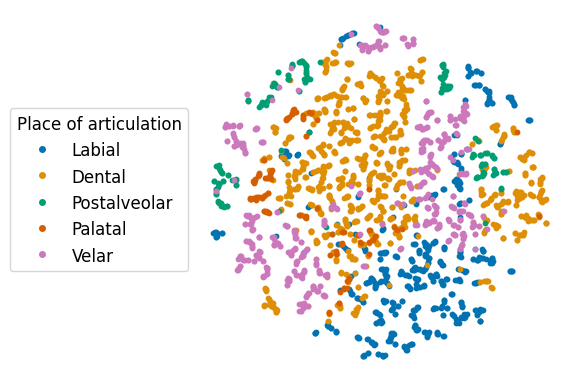

In [31]:
from matplotlib.lines import Line2D
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams.update({'font.size': 12, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':4, 'lines.linewidth':1})


# 1) manner
#color_labels = ['plosive', 'fricative', 'nasal', 'approximant'] 
# 2) place
Y_color = np.asarray(Y_place)
color_labels = ['labial', 'dental', 'post_alveolar', 'palatal', 'velar']
rgb_values = sns.color_palette('colorblind', len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

cm = 1/2.54
fig, ax = plt.subplots(1, 1, figsize=(12*cm,12*cm))

for label in color_labels:
    dots = np.where(Y_color == label)
    ax.scatter(X_embedded_gold[dots,0], X_embedded_gold[dots,1], color=color_map[label], s=10)

legend_label_map = {'labial': 'Labial', 'dental': 'Dental', 
                    'post_alveolar': 'Postalveolar', 'palatal': 'Palatal',
                    'velar': 'Velar'}
legend_elements = [Line2D([], [], marker='o', color=color_map[label], linestyle='None', label=legend_label_map[label]) for label in color_labels]
ax.legend(handles=legend_elements, title='Place of articulation', bbox_to_anchor=(0,0.75))
ax.set_yticks([])
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('/home/engaclew/agent/out/imitative_agent/tsne_gold_place.png', dpi=300, bbox_inches='tight')


In [32]:
# TSNE on learned art params
X_embedded_learned = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X_learned)

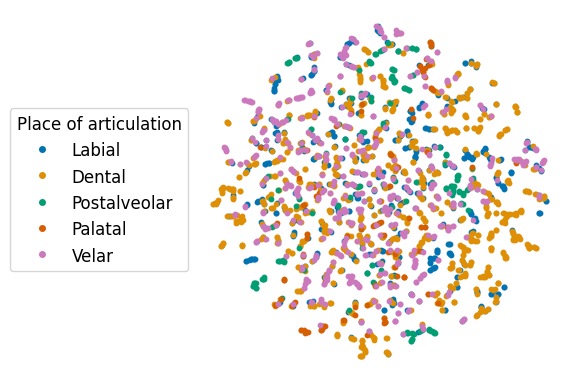

In [33]:
from matplotlib.lines import Line2D
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams.update({'font.size': 12, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':4, 'lines.linewidth':1})


# 1) manner
#color_labels = ['plosive', 'fricative', 'nasal', 'approximant'] 
# 2) place
Y_color = np.asarray(Y_place)
color_labels = ['labial', 'dental', 'post_alveolar', 'palatal', 'velar']
rgb_values = sns.color_palette('colorblind', len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

cm = 1/2.54
fig, ax = plt.subplots(1, 1, figsize=(12*cm,12*cm))

for label in color_labels:
    dots = np.where(Y_color == label)
    ax.scatter(X_embedded_learned[dots,0], X_embedded_learned[dots,1], color=color_map[label], s=10)

legend_label_map = {'labial': 'Labial', 'dental': 'Dental', 
                    'post_alveolar': 'Postalveolar', 'palatal': 'Palatal',
                    'velar': 'Velar'}
legend_elements = [Line2D([], [], marker='o', color=color_map[label], linestyle='None', label=legend_label_map[label]) for label in color_labels]
ax.legend(handles=legend_elements, title='Place of articulation', bbox_to_anchor=(0,0.75))
ax.set_yticks([])
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('/home/engaclew/agent/out/imitative_agent/tsne_imitative_agent_dynamic_gan_place.png', dpi=300, bbox_inches='tight')